# Homework 5
## Andrew Lincowski and Spencer Wallace

## 1)
Take magnification maps made by the planet_star.jl microlensing code & add code to convolve the map with circular sources of a range of sizes (0.25 - 4 RE,planet).  Plot how the maximum magnification varies with the ratio of the angular size of the source to the Einstein angle of the planet, locating the planet at u_planet=1.3 times the Einstein angle of the star. 

In [46]:
using PyPlot
include("planet_moon_star.jl")

planet_moon_star (generic function with 1 method)

Mass ratio: 1.0e-5
1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
6000/10000
7000/10000
8000/10000
9000/10000
10000/

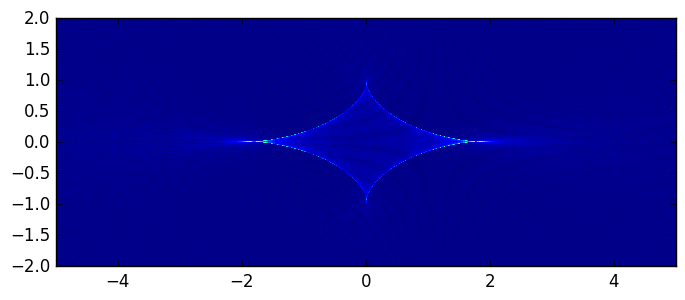

1000x1000 Array{Float64,2}:
 1.0       1.0       1.55556   0.857143  …  1.0       1.16667   0.954545
 0.75      0.75      0.84      0.9          0.833333  0.678571  0.913043
 1.0       1.0       1.0       1.0          1.16667   1.04762   1.16667 
 1.33333   1.0       0.913043  0.75         1.05556   1.0       1.11111 
 0.75      0.923077  1.16667   1.33333      1.22222   1.0       1.0     
 1.0       0.857143  1.05556   1.11111   …  1.0       1.05556   1.0     
 1.0       0.857143  0.857143  0.875        0.84      0.75      0.791667
 0.703704  0.72      0.857143  1.16667      0.75      1.0       1.16667 
 1.28571   1.33333   1.33333   1.55556      0.9       1.11111   1.05556 
 1.0       1.0       0.818182  0.875        1.05556   1.11111   1.05    
 0.875     0.75      0.9       1.0       …  1.16667   1.0       1.04762 
 1.16667   1.0       1.0       0.952381     0.95      0.875     0.75    
 1.55556   1.33333   0.96      0.888889     0.863636  1.27778   0.904762
 ⋮                     

10000
Range of grid, y1: 1.284188611699158 1.289502819307071 1.315811388300842 1.3105572639684722
Range of grid, y2: -0.047434164902525694 -0.016995661284574956 0.047434164902525694 0.016995661284574956


In [47]:
yplanet = 1.3
y1moon = 0.0
y2moon = 0.0
eps1 = 1e-5
eps2 = 0.0
lens_map = planet_moon_star(yplanet,y1moon,y2moon,eps1,eps2)

In [48]:
len, len = size(lens_map)
source_map = zeros(Float64, len, len)

1000x1000 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  

In [110]:
function pl_map(dist,r,len)

    map_width = 10.
    map_height = 4.

    dx = map_width/len
    dy = map_height/len
    
    source_map = zeros(Float64, len, len)
    r2 = r^2
    for i in 1:len
        for j in 1:len
            x = (i-1)*dx - (map_width/2.) + (dx/2.)
            y = (j-1)*dy - (map_height/2.) + (dy/2.)
            if ((x-dist)^2 + y^2) < r2
                source_map[i,j] = 1.0
            end
        end
    end
    return source_map'
end

pl_map (generic function with 1 method)

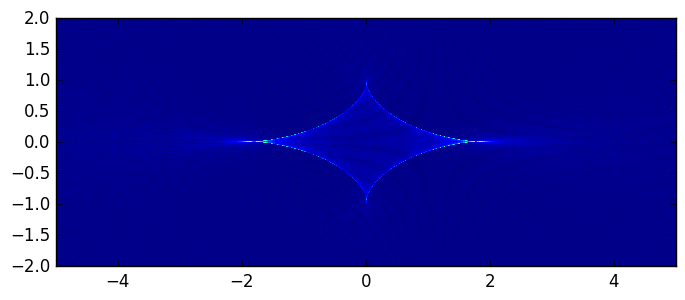

PyObject <matplotlib.image.AxesImage object at 0x7f8eef5f0d50>

In [111]:
PyPlot.imshow(lens_map, interpolation = "nearest", extent =[-5,5,-2,2])

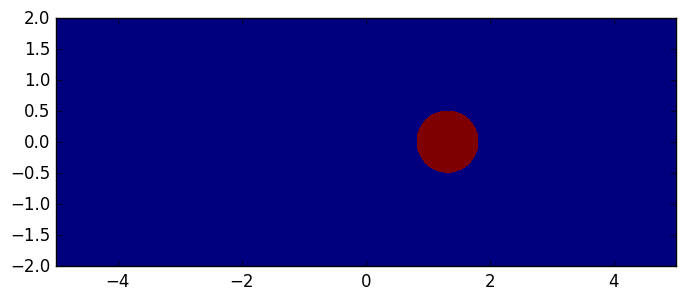

PyObject <matplotlib.image.AxesImage object at 0x7f8eef546f50>

In [112]:
source_map = pl_map(yplanet,0.5,1000)
PyPlot.imshow(source_map, interpolation = "nearest", extent =[-5,5,-2,2])

In [113]:
radii = collect(linspace(0.25,4.0,10))
maxvals = zeros(length(radii))
for i in 1:length(radii)
    source_map = pl_map(yplanet,radii[i],len)
    conv_image = conv2(source_map, lens_map)
    maxvals[i] = maximum(conv_image)/(pi*radii[i]^2)
end

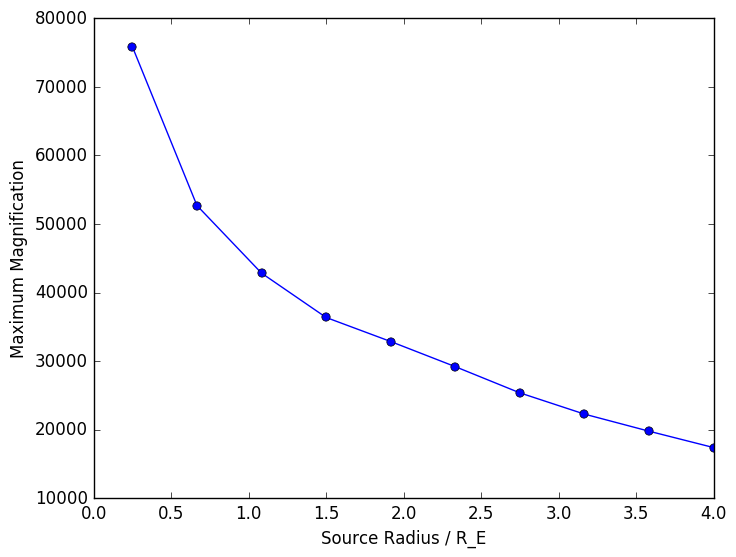

PyObject <matplotlib.text.Text object at 0x7f8eef500950>

In [114]:
plot(radii,maxvals,"-o")
xlabel("Source Radius / R_E")
ylabel("Maximum Magnification")

## 2)
Taking an Earth-mass planet orbiting a 0.3 solar mass star at a lens distance of 5 kpc, and a source at 8kpc, what is the Einstein angle of the planet in $\mu as$?  What angular size of the source is needed to have a deviation greater than 20% relative to a lens without a planet?   What is this in solar radii?  Are giant stars viable targets for microlensing surveys for Earth-like planets?  How does this motivate WFIRST-AFTA?

In [130]:
G = 6.67259e-8 # cm^3 g^-1 s^-2
c = 2.99892458e10 # cm s^-1
Mearth = 5.976e27 # g
Rsun = 6.96e10 # cm
kpc2cm = 1e3*3.086e18 # cm per kpc
rad2arcsec = 206265. # arcseconds per radian

dL = 5.*kpc2cm
dS = 8.*kpc2cm
dLS = 3.*kpc2cm

thetaE = sqrt(4.*G*Mearth/c^2*dLS/(dL*dS))*rad2arcsec*1e6
println("Einstein angle = ", thetaE, " micro arcseconds")

Einstein angle = 1.3541762051561839 micro arcseconds


In [133]:
rE = thetaE/(rad2arcsec*1e6)*dL

# A source with radius rE/1.2 will produce 20% magnification
thetaSource = rE/1.2/dS*rad2arcsec*1e6
rSource = rE/1.2/Rsun
println("Angular size of source required for 20% magnification: ", thetaSource, " micro acrseconds")
println("Physical size of the source: ", rSource, " R_sun")

Angular size of source required for 20% magnification: 0.7053001068521793 micro acrseconds
Physical size of the source: 1.2129002278041638 R_sun


Giant stars are much larger than ~1.2 R_sun. As the source radius increases, the amount of magnification decreases. This means that giant stars will produce much less than 20% magnification, meaning that thay are not useful targets for microlensing surveys for Earth-like planets.

WFIRST-AFTA is an infrared survey. It will be much more effective at observing cooler, low mass stars which are smaller than 1.2 R_sun.The magnification of an Earth sized planet will be more pronounced around these cooler stars.